In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge

import json
import joblib

In [2]:
df = pd.read_csv("D:\Machine Data\Advanced SE\Cleaned_2018_Flights.csv")

In [3]:
df.shape

(9534417, 14)

In [4]:
df.sample(7)

,Unnamed: 0,ItinID,MktID,MktCoupons,Quarter,Origin,OriginWac,Dest,DestWac,Miles,ContiguousUSA,NumTicketsOrdered,AirlineCompany,PricePerTicket
2788426,2788426,201821330145,20182133014501,1,2,SEA,93,LAX,91,954.0,2,20.0,AS,270.50
1241803,1241803,201812370603,20181237060301,1,1,DEN,82,MCO,33,1546.0,2,11.0,F9,55.50
3337958,3337958,201825190106,20182519010601,1,2,MDW,41,PDX,92,1751.0,2,2.0,WN,172.00
8094273,8094273,20184891616,2018489161601,1,4,PHL,23,RDU,36,337.0,2,2.0,AA,352.00
8633426,8633426,20184314527,2018431452701,1,4,DCA,38,LAS,85,2089.0,2,1.0,AA,289.00
3396586,3396586,201825265995,20182526599501,1,2,OMA,65,DCA,38,1012.0,2,1.0,WN,239.08
7291,7291,20181779480,2018177948001,1,1,PHL,23,PBI,33,951.0,2,1.0,AA,341.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9534417 entries, 0 to 9534416
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   ItinID             int64  
 2   MktID              int64  
 3   MktCoupons         int64  
 4   Quarter            int64  
 5   Origin             object 
 6   OriginWac          int64  
 7   Dest               object 
 8   DestWac            int64  
 9   Miles              float64
 10  ContiguousUSA      int64  
 11  NumTicketsOrdered  float64
 12  AirlineCompany     object 
 13  PricePerTicket     float64
dtypes: float64(3), int64(8), object(3)
memory usage: 1018.4+ MB


In [6]:
df.drop(columns=['Unnamed: 0', 'ItinID', 'MktID'], inplace=True)

<AxesSubplot:>

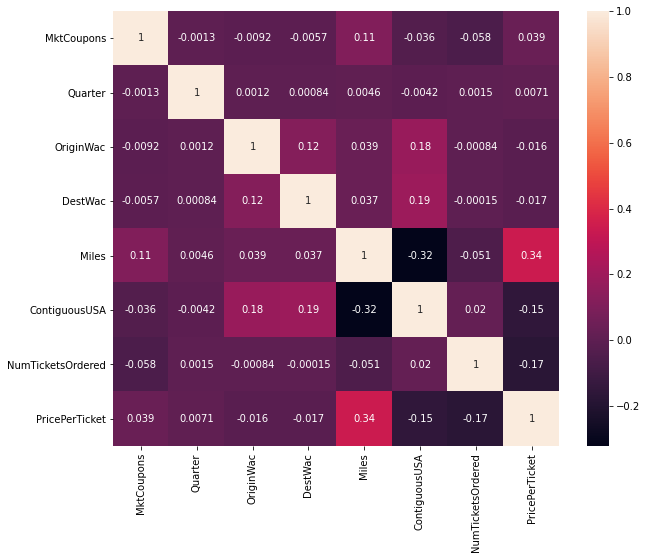

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

# EDA

#### We need to notice here that `OriginWac` and `DestWac` are the area codes for `Origin` and `Dest` respectively; so we will be visualizing the latar 2 mentioned features

In [8]:
num_cols = []
cat_cols = []

for col,col_type in zip(df.columns,df.dtypes):
    if(col_type=='int64' or col_type=='float64'): 
        num_cols.append(col)
    else:
        cat_cols.append(col)

In [9]:
num_cols.remove('OriginWac')
num_cols.remove('DestWac')
num_cols

['MktCoupons',
 'Quarter',
 'Miles',
 'ContiguousUSA',
 'NumTicketsOrdered',
 'PricePerTicket']

In [10]:
cat_cols

['Origin', 'Dest', 'AirlineCompany']

<AxesSubplot:xlabel='AirlineCompany', ylabel='count'>

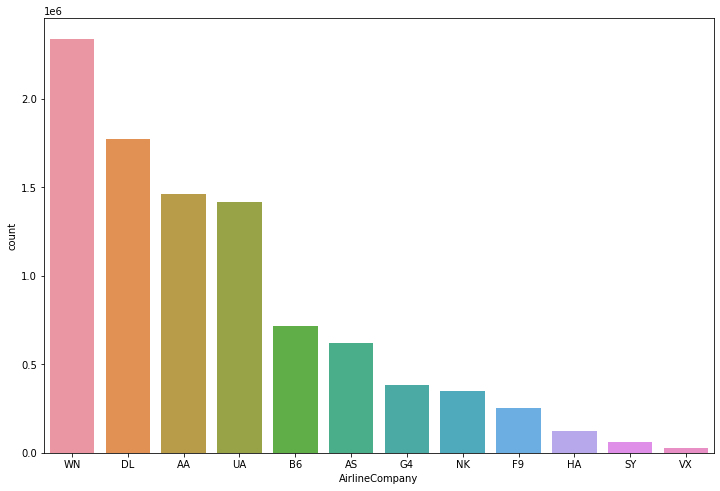

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x=cat_cols[2], order = df[cat_cols[2]].value_counts().index)

In [12]:
def plot_counts(figsize, data ,columns, shape):
    fig = plt.figure(figsize=figsize)
    pos = shape * 10 + 1

    for col in columns:
        ax = fig.add_subplot(pos)
        sns.countplot(df[col], data=data, order = df[col].value_counts().index)
        pos+=1
        
        plt.yticks(size=14)
        plt.xticks(size=14)
        
        ax.set_xlabel(col, fontsize=16)
        ax.set_ylabel('Count', fontsize=16)
        ax.set_title('{} Countplot'.format(col),fontsize=18)
        
        for p in ax.patches:
            ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+5), fontsize=12)

c:\users\maysa\pycharmprojects\data analysis with python\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\maysa\pycharmprojects\data analysis with python\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\maysa\pycharmprojects\data analysis with python\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an 

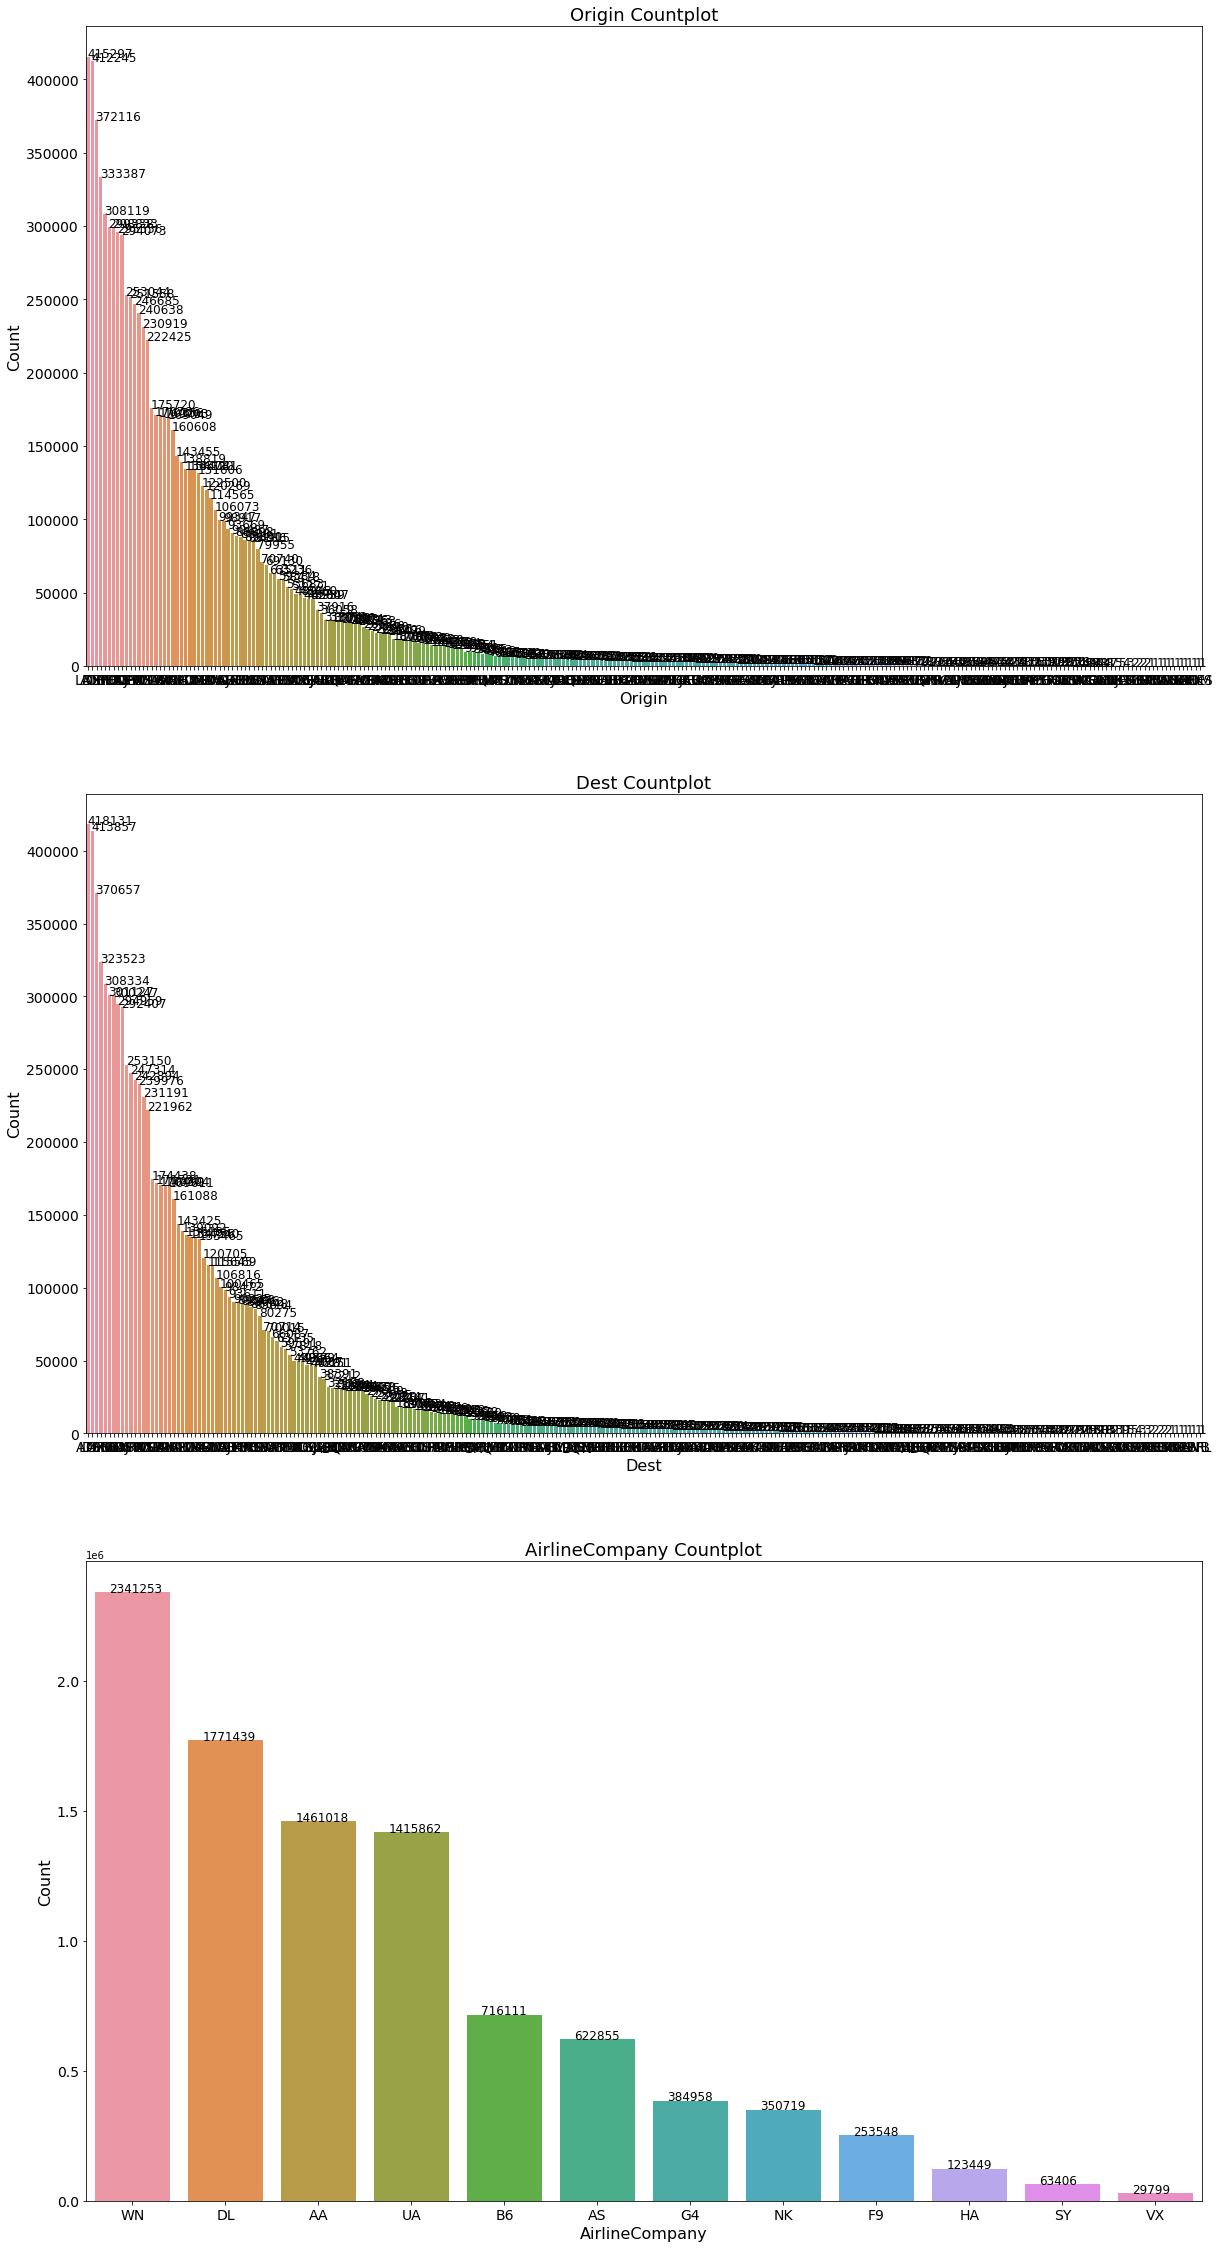

In [13]:
plot_counts((20,40), df, cat_cols, 31)

#### Testing the normality of `PricePerTicket` columns

c:\users\maysa\pycharmprojects\data analysis with python\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PricePerTicket', ylabel='Density'>

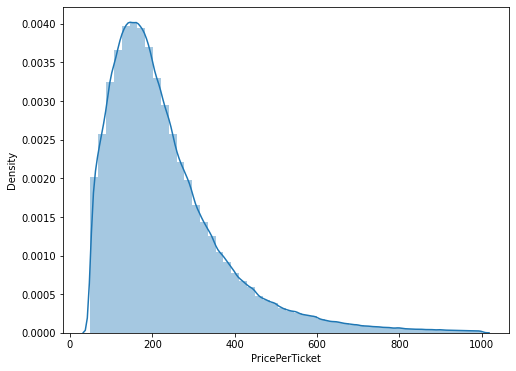

In [14]:
plt.figure(figsize=(8,6))
sns.distplot(df['PricePerTicket'])

##### It's clear that our target variable is skewed to right! so transforming it with `log` or `boxcox` will enhance our predictions

# Preprocessing

##### Another one important note is that `OriginWac`, `DestWac`, `Origin`, `Dest` are just useless features in our prediction process because they are just the names of airports and their codes. What really matter, is the distance (Miles Traveled) between `Origin` and `Dest`, so we will drop these columns.

In [15]:
df.drop(columns=['Origin', 'OriginWac', 'Dest', 'DestWac'], inplace=True)

In [16]:
df.head()

,MktCoupons,Quarter,Miles,ContiguousUSA,NumTicketsOrdered,AirlineCompany,PricePerTicket
0,1,1,2402.0,2,1.0,AA,672.87
1,1,1,2402.0,2,1.0,AA,367.68
2,1,1,2402.0,2,1.0,AA,417.94
3,1,1,2402.0,2,1.0,AA,247.10
4,1,1,2402.0,2,1.0,AA,276.35


##### Now we are going to handle `AirlineCompany`. We will be using One-Hot-Encoding to encode this column.

In [17]:
df2 = pd.get_dummies(df['AirlineCompany'])
df2

,AA,AS,B6,DL,F9,G4,HA,NK,SY,UA,VX,WN
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9534412,0,0,0,0,0,0,0,0,0,0,0,1
9534413,0,0,0,0,0,0,0,0,0,0,0,1
9534414,0,0,0,0,0,0,0,0,0,0,0,1
9534415,0,0,0,0,0,0,0,0,0,0,0,1


In [18]:
df = pd.concat([df, df2], axis=1, join="inner")
df

,MktCoupons,Quarter,Miles,ContiguousUSA,NumTicketsOrdered,AirlineCompany,PricePerTicket,AA,AS,B6,DL,F9,G4,HA,NK,SY,UA,VX,WN
0,1,1,2402.0,2,1.0,AA,672.87,1,0,0,0,0,0,0,0,0,0,0,0
1,1,1,2402.0,2,1.0,AA,367.68,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,2402.0,2,1.0,AA,417.94,1,0,0,0,0,0,0,0,0,0,0,0
3,1,1,2402.0,2,1.0,AA,247.10,1,0,0,0,0,0,0,0,0,0,0,0
4,1,1,2402.0,2,1.0,AA,276.35,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9534412,1,4,721.0,2,1.0,WN,310.10,0,0,0,0,0,0,0,0,0,0,0,1
9534413,1,4,491.0,2,1.0,WN,106.17,0,0,0,0,0,0,0,0,0,0,0,1
9534414,1,4,1260.0,2,1.0,WN,161.19,0,0,0,0,0,0,0,0,0,0,0,1
9534415,1,4,1260.0,2,1.0,WN,170.87,0,0,0,0,0,0,0,0,0,0,0,1


In [19]:
df.drop(columns=['AirlineCompany'], inplace=True)
df

,MktCoupons,Quarter,Miles,ContiguousUSA,NumTicketsOrdered,PricePerTicket,AA,AS,B6,DL,F9,G4,HA,NK,SY,UA,VX,WN
0,1,1,2402.0,2,1.0,672.87,1,0,0,0,0,0,0,0,0,0,0,0
1,1,1,2402.0,2,1.0,367.68,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,2402.0,2,1.0,417.94,1,0,0,0,0,0,0,0,0,0,0,0
3,1,1,2402.0,2,1.0,247.10,1,0,0,0,0,0,0,0,0,0,0,0
4,1,1,2402.0,2,1.0,276.35,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9534412,1,4,721.0,2,1.0,310.10,0,0,0,0,0,0,0,0,0,0,0,1
9534413,1,4,491.0,2,1.0,106.17,0,0,0,0,0,0,0,0,0,0,0,1
9534414,1,4,1260.0,2,1.0,161.19,0,0,0,0,0,0,0,0,0,0,0,1
9534415,1,4,1260.0,2,1.0,170.87,0,0,0,0,0,0,0,0,0,0,0,1


# Building Our Model

In [20]:
X = df.drop(columns=['PricePerTicket'])
y = df['PricePerTicket']

In [21]:
import gc
del [df]
gc.collect()

85227

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [23]:
scaler = StandardScaler()

In [24]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [25]:
# del [[X_train, X_test]]
# gc.collect()

In [26]:
lr = LinearRegression()
lr.fit(X_train_s, y_train)
y_pred = lr.predict(X_test_s)

In [27]:
print('R^2 for linear Regression: ', lr.score(X_test_s, y_test))

R^2 for linear Regression:  0.25662205854714903


c:\users\maysa\pycharmprojects\data analysis with python\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Residuals'), Text(0, 0.5, 'Frequency')]

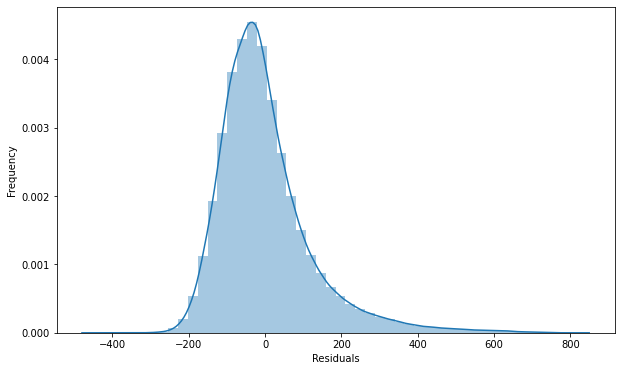

In [28]:
fig = plt.figure(figsize=(10,6))
ax = sns.distplot((y_test - y_pred))
ax.set(xlabel='Residuals', ylabel='Frequency')

##### We can see that the residuals are not a perfectly normally distribued so that there are some patterns not detected in our model.

##### Now, we will transform the target variable using `log transformation` to enhance our prediction

In [29]:
lr2 = LinearRegression()
lr2.fit(X_train_s, np.log(y_train))

LinearRegression()

In [30]:
y_pred2 = lr2.predict(X_test_s)

In [31]:
print('R^2 for Linear Regression with Transformation', lr2.score(X_test_s, np.log(y_test)))

R^2 for Linear Regression with Transformation 0.3330140575278723


##### Never forget to cancel the transformation by applying the `np.exp()` function to the predicted values

c:\users\maysa\pycharmprojects\data analysis with python\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Residuals'), Text(0, 0.5, 'Frequency')]

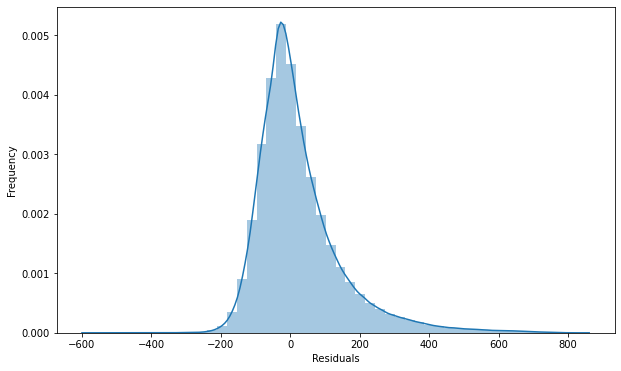

In [32]:
fig = plt.figure(figsize=(10,6))
ax = sns.distplot((y_test - np.exp(y_pred2)))
ax.set(xlabel='Residuals', ylabel='Frequency')

#### Predicting Some Values

In [33]:
record = 1

In [34]:
X_test_s[record].reshape(1,-1)

array([[-0.13540826, -1.40046331, -0.50141652,  0.24166681, -0.48983241,
        -0.42549365, -0.26429237, -0.28496462,  2.09362782, -0.16508801,
        -0.20496254, -0.1146799 , -0.19538102, -0.08173867, -0.41764036,
        -0.0559474 , -0.57069628]])

In [35]:
logged_pred = lr2.predict(X_test_s[record].reshape(1,-1))
logged_pred

array([5.40726946])

In [36]:
# or 
(lr2.coef_ * X_test_s[record].reshape(1,-1)).sum() + lr2.intercept_

5.407269479706754

In [37]:
print('predicted value:', np.exp(logged_pred)[0])
print('actual value :', y_test[record:record+1].values[0])

predicted value: 223.02178668023018
actual value : 239.5


### ---------------------------------------------------------------------------------------------------------------------------------------------

##### Checking coefs.

In [38]:
# coefs
lr2.coef_

array([-6.95219380e-03,  6.93279906e-03,  1.72833025e-01, -2.01276484e-02,
       -8.18724560e-02, -8.64016487e+07, -5.92457076e+07, -6.32089103e+07,
       -9.32713047e+07, -3.85418888e+07, -4.71734982e+07, -2.71461512e+07,
       -4.51343988e+07, -1.94729149e+07, -8.52850824e+07, -1.33757457e+07,
       -1.03242142e+08])

In [39]:
# means
scaler.mean_

array([1.01803068e+00, 2.55819437e+00, 1.20160337e+03, 1.94481983e+00,
       2.41017440e+00, 1.53292102e-01, 6.52899279e-02, 7.51058761e-02,
       1.85760442e-01, 2.65309730e-02, 4.03159809e-02, 1.29807636e-02,
       3.67700899e-02, 6.63686865e-03, 1.48518378e-01, 3.12034493e-03,
       2.45678253e-01])

In [40]:
# variances
scaler.var_

array([1.77310258e-02, 1.23794055e+00, 4.86131715e+05, 5.21353161e-02,
       8.28801676e+00, 1.29793633e-01, 6.10271532e-02, 6.94649835e-02,
       1.51253500e-01, 2.58270805e-02, 3.86906026e-02, 1.28122634e-02,
       3.54180504e-02, 6.59282063e-03, 1.26460669e-01, 3.11060838e-03,
       1.85320449e-01])

In [41]:
# standard deviations
scaler.scale_

array([1.33157898e-01, 1.11262777e+00, 6.97231464e+02, 2.28331592e-01,
       2.87889158e+00, 3.60268835e-01, 2.47036745e-01, 2.63562106e-01,
       3.88913230e-01, 1.60708060e-01, 1.96699269e-01, 1.13191269e-01,
       1.88196839e-01, 8.11961860e-02, 3.55613090e-01, 5.57728283e-02,
       4.30488617e-01])

##### Creating Dictionaries

In [42]:
cols = list(X.columns)
cols

['MktCoupons',
 'Quarter',
 'Miles',
 'ContiguousUSA',
 'NumTicketsOrdered',
 'AA',
 'AS',
 'B6',
 'DL',
 'F9',
 'G4',
 'HA',
 'NK',
 'SY',
 'UA',
 'VX',
 'WN']

In [43]:
weights_dict = dict(zip(cols, lr2.coef_))
json.dumps(weights_dict)

'{"MktCoupons": -0.00695219379719792, "Quarter": 0.006932799056330374, "Miles": 0.17283302548240986, "ContiguousUSA": -0.02012764842744717, "NumTicketsOrdered": -0.08187245603538572, "AA": -86401648.68972409, "AS": -59245707.63263967, "B6": -63208910.339535005, "DL": -93271304.7226297, "F9": -38541888.815319546, "G4": -47173498.21359157, "HA": -27146151.20391268, "NK": -45134398.816742234, "SY": -19472914.887776103, "UA": -85285082.35030282, "VX": -13375745.72993392, "WN": -103242142.18479592}'

In [44]:
means_dict = dict(zip(cols, scaler.mean_))
json.dumps(means_dict)

'{"MktCoupons": 1.0180306795927512, "Quarter": 2.5581943700939136, "Miles": 1201.60337301554, "ContiguousUSA": 1.9448198330483308, "NumTicketsOrdered": 2.410174396977574, "AA": 0.15329210165223195, "AS": 0.06528992791308176, "B6": 0.07510587608791841, "DL": 0.1857604423106075, "F9": 0.026530972986004948, "G4": 0.040315980898393076, "HA": 0.012980763583212648, "NK": 0.03677008988629543, "SY": 0.0066368686521195075, "UA": 0.14851837805273024, "VX": 0.0031203449342536204, "WN": 0.2456782530431509}'

In [45]:
stds_dict = dict(zip(cols, scaler.scale_))
json.dumps(stds_dict)

'{"MktCoupons": 0.13315789815544396, "Quarter": 1.1126277697781237, "Miles": 697.2314642952059, "ContiguousUSA": 0.22833159248526078, "NumTicketsOrdered": 2.8788915847350482, "AA": 0.36026883465444776, "AS": 0.24703674468828796, "B6": 0.26356210551781656, "DL": 0.38891322988961813, "F9": 0.16070805971830038, "G4": 0.19669926940025348, "HA": 0.11319126892127926, "NK": 0.18819683944224233, "SY": 0.08119618603489961, "UA": 0.35561308951347215, "VX": 0.05577282834629156, "WN": 0.43048861660306026}'

In [46]:
scaler_name = 'scaler.sav'
joblib.dump(scaler, scaler_name)

['scaler.sav']

In [47]:
model_name = 'finalized_model.sav'
joblib.dump(lr2, model_name)

['finalized_model.sav']

In [49]:
my_scaler = joblib.load(scaler_name)
model = joblib.load(model_name)